confidence interval

In [1]:
set.seed(2020-10-28)
# function for two-sided confidence interval
CI <- function(x) {# x is a vector of random variables
  # nominal coverage probability is 90%
  n <- length(x)
  mu <- mean(x)
  sig <- sd(x)
  upper <- mu + 1.645 / sqrt(n) * sig
  lower <- mu - 1.645/ sqrt(n) * sig
  return(list(lower = lower, upper = upper))
}

empirical coverage

In [2]:
Rep <- 1000
sample_size <- 10
capture <- rep(0, Rep)
Bounds <- matrix(0, nrow = Rep, ncol = 2)
for (i in 1:Rep) {
  mu <- 2
  x <- rpois(sample_size, mu)
  bounds <- CI(x)
  capture[i] <- ((bounds$lower <= mu) & (mu <= bounds$upper))
  Bounds[i,] <- unlist( bounds )
}
cat("the emprical coverage probability = ", mean(capture)) # empirical size

the emprical coverage probability =  0.845

25 replications

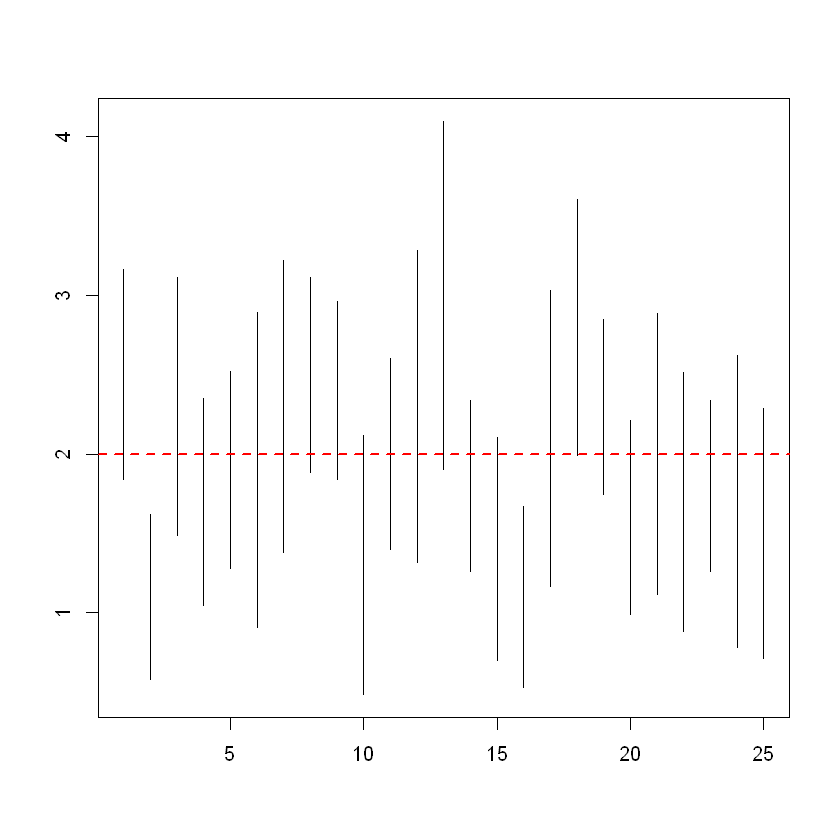

In [3]:
Bounds25 <- Bounds[1:25, ]
plot(1, type="n", xlab="", ylab="", 
     ylim=c(min(Bounds25), max(Bounds25)), xlim=c(1, 25))
segments(x0= 1:25, y0=Bounds25[,1], x1 = 1:25, y1 = Bounds25[,2])
abline(h=2, col = "red", lty = 2, lwd = 2)